In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import math
import pandas as pd
import copy
from sklearn.metrics import accuracy_score

In [ ]:
def random_ora(a,b,r1,r2,c):
    Y = list()
    X = np.random.uniform(a-r2,a+r2,c).tolist()
    for x in X:
        if x>a+r1 or x<a-r1:
            lim = np.sin(np.arccos((x-a)/r2))*r2
            Y.append(np.random.uniform(b-lim,b+lim))
        else:
            lim1 = np.sin(np.arccos((x-a)/r1))*r1
            lim2 = np.sin(np.arccos((x-a)/r2))*r2
            rand = np.random.uniform((b+lim1,b-lim2),(b+lim2,b-lim1))
            Y.append(rand[randint(0,1)])
    return np.array(X),np.array(Y)

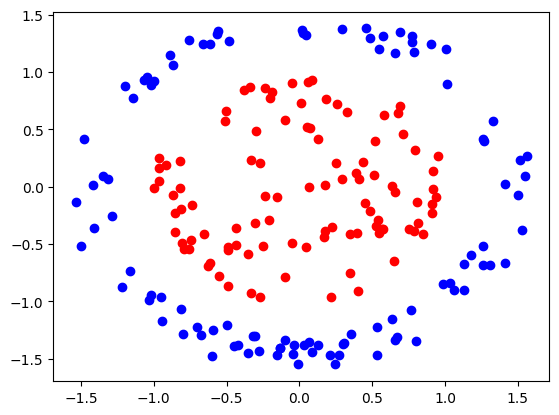

In [ ]:
X1,Y1 = random_ora(0, 0, 0, 1, 100)
X2,Y2 = random_ora(0, 0, 1.3, 1.6, 100)
plt.scatter(X1, Y1, color='r')
plt.scatter(X2, Y2, color='b')
plt.plot()
data = np.zeros((200,3))
data[100:200,2] = np.ones((100,))
data[0:100,0] = X1
data[100:200,0] = X2
data[0:100,1] = Y1
data[100:200,1] = Y2

In [ ]:
class Madaline():
    def __init__(self, num_l, epochs=500, learning_rate=0.1):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.w = np.random.rand(num_l, 2)
        self.v = [1] * num_l
        self.b = np.random.rand(num_l, 1)
        self.b2 = num_l - 1

    def fit(self, X, Y):
        count = 0
        for iter in range(self.epochs):
            for x, label in zip(X, Y):
                z_in = np.array([np.matmul(x, self.w.T)]).T + self.b
                z = np.heaviside(z_in, 1) * 2 - 1
                y_in = np.dot(np.squeeze(z), np.squeeze(self.v)) + self.b2
                y = np.heaviside(y_in, 1) * 2 - 1
                if y != label:
                    if label == 1:
                        z_j = max(z_in)
                        indices = np.where(z_in == z_j)
                        self.w[indices, :] = self.w[indices, :] + self.learning_rate * (1 - z_in[indices]) * np.array(x)
                        self.b[indices] = self.b[indices] + self.learning_rate * (1 - z_in[indices])
                    else:
                        indices = [i for i, x in enumerate(z_in) if x > 0]
                        for ind in indices:
                            self.w[ind, :] = self.w[ind, :] + self.learning_rate * (-1 - z_in[ind]) * np.array(x)
                            self.b[ind] = self.b[ind] + self.learning_rate * (-1 - z_in[ind])

    def predict(self, X):
        y = []
        for item in X:
            z_in = np.array([np.matmul(item, self.w.T)]).T + self.b
            z = np.heaviside(z_in, 1) * 2 - 1
            y_in = np.dot(np.squeeze(z), np.squeeze(self.v)) + self.b2
            y.append(np.heaviside(y_in, 1) * 2 - 1)
        return y

In [ ]:
data = pd.DataFrame(data)
X = np.array(list(zip(data.iloc[:, 0], data.iloc[:, 1])))

Accuracy: 0.77


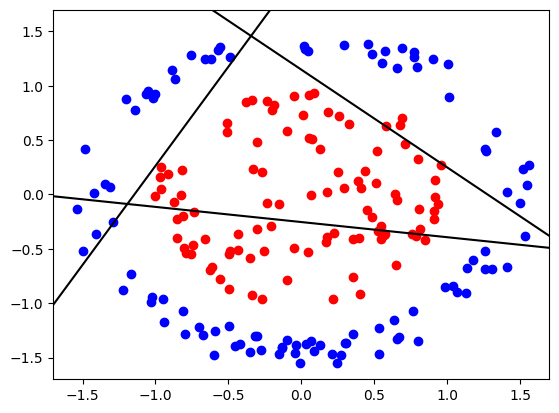

In [ ]:
dfs = data.copy(deep=True)
n = 3
model = Madaline(n, epochs=300)
model.fit(X, data.iloc[:, 2])
pred = [max(0,i) for i in model.predict(X)]
acc = accuracy_score(pred, data.iloc[:, 2])
print("Accuracy:", acc)
for i in range(n):
    plt.axline((0, float(-model.b[i] / model.w[i][1])), slope=-model.w[i][0] / model.w[i][1], color="black")
plt.scatter(X1, Y1, color='r')
plt.scatter(X2, Y2, color='b')
plt.xlim([-1.7, 1.7])
plt.ylim([-1.7, 1.7])
plt.show()

Accuracy: 1.0


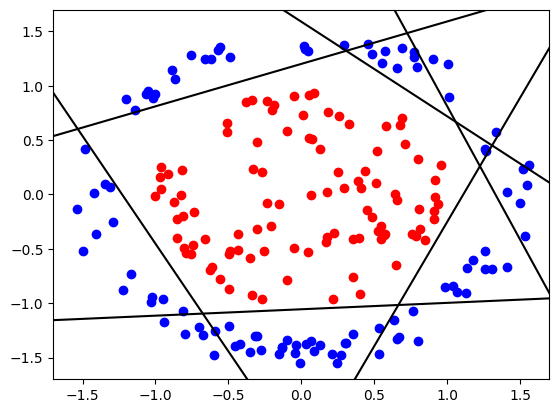

In [ ]:
dfs = data.copy(deep=True)
n = 6
model = Madaline(n, epochs=100)
model.fit(X, data.iloc[:, 2])
pred = [max(0,i) for i in model.predict(X)]
acc = accuracy_score(pred, data.iloc[:, 2])
print("Accuracy:", acc)
for i in range(n):
    plt.axline((0, float(-model.b[i] / model.w[i][1])), slope=-model.w[i][0] / model.w[i][1], color="black")
plt.scatter(X1, Y1, color='r')
plt.scatter(X2, Y2, color='b')
plt.xlim([-1.7, 1.7])
plt.ylim([-1.7, 1.7])
plt.show()